# Vertical Electrical Sounding

## 1D DC Resistivity Forwad Model

In [1]:
# In case you need to install SimPEG comment out the following line for installation

#!pip install SimPEG --ignore-installed

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

from SimPEG import maps
from SimPEG.electromagnetics.static import resistivity as dc

### Reconstruct Textbook example (Section 4 - Fig. 4.9  page 167)

#### 3 layer model: 

$p_1 = 500 \Omega m$   with   $t_1 = 5m$

$p_2 = 200 \Omega m$   with   $t_2 = 10m$ 

$p_3 = 50 \Omega m$ or 500 \Omega m$


In [3]:
# Define the 'a' spacing for Schlumberger array measurements for each reading
number_of_measurements=19

# From 1 to 1000m logarithmic equidistant measurements
a_b_electrode_separations = np.logspace(0.1, 3, number_of_measurements)
m_n_electrode_separations = 0.01 * a_b_electrode_separations 

source_list = []  # create empty array for sources to live

for ab, mn in zip(a_b_electrode_separations, m_n_electrode_separations):


    # AB electrode locations for source. Each is a (1, 3) numpy array
    A_location = np.r_[-ab, 0.0, 0.0]
    B_location = np.r_[ab, 0.0, 0.0]

    # MN electrode locations for receivers. Each is an (N, 3) numpy array
    M_location = np.r_[-mn, 0.0, 0.0]
    N_location = np.r_[mn, 0.0, 0.0]

    # Create receivers list. Define as pole or dipole.
    receiver_list = dc.receivers.Dipole(
        M_location, N_location, data_type="apparent_resistivity"
    )
    receiver_list = [receiver_list]

    # Define the source properties and associated receivers
    source_list.append(dc.sources.Dipole(receiver_list, A_location, B_location))

# Define survey
survey = dc.Survey(source_list)

electrode_separations = 0.5 * np.sqrt(
    np.sum((survey.locations_a - survey.locations_b) ** 2, axis=1)
)

In [4]:
# Define layer thicknesses.
layer_thicknesses = np.r_[5.0, 10.0]

# Define layer resistivities.
model_50 = np.r_[500, 200, 50]

# Define mapping from model to 1D layers.
model_map = maps.IdentityMap(nP=len(model_50))

simulation = dc.simulation_1d.Simulation1DLayers(
    survey=survey,
    rhoMap=model_map,
    thicknesses=layer_thicknesses,
)

# Predict data for a given model
prediction_model_50 = simulation.dpred(model_50)

In [5]:
# Define layer resistivities.
model_500 = np.r_[500, 200, 500]

# Define mapping from model to 1D layers.
model_map = maps.IdentityMap(nP=len(model_500))

simulation = dc.simulation_1d.Simulation1DLayers(
    survey=survey,
    rhoMap=model_map,
    thicknesses=layer_thicknesses,
)

# Predict data for a given model
prediction_model_500 = simulation.dpred(model_500)

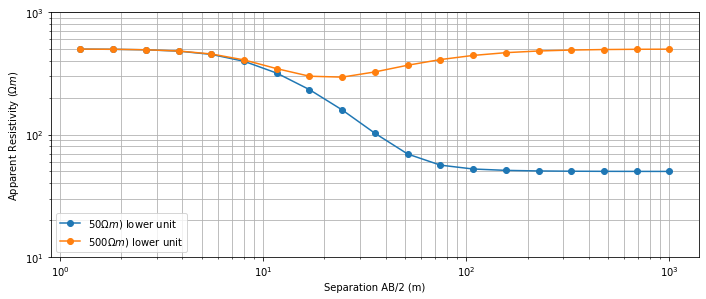

In [6]:
# Plot apparent resistivities on sounding curve# Plot apparent resistivities on sounding curve
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_axes([0.1, 0.1, 0.75, 0.85])
ax1.loglog( a_b_electrode_separations, prediction_model_50,  marker='o', label = "$50 \Omega m$) lower unit")
ax1.loglog( a_b_electrode_separations, prediction_model_500, marker='o',label = "$500 \Omega m$) lower unit")
ax1.set_ylim([10, 1000])
ax1.set_xlabel("Separation AB/2 (m)")
ax1.set_ylabel(r"Apparent Resistivity ($\Omega m$)")
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()
